(solving-systems-of-odes-section)=

# Systems of ODEs

So far we have only looked at the solution of a single ODE. In most practical cases, a system of multiple ODEs is required to model a real-world situation. Recall that a single first-order ODE is expressed as a function of the single independent variable $t$ and a dependent function $y$

$$ y' = f(t, y). $$

A system of first-order ODEs is expressed as a set of multiple ODEs such that

$$ \begin{align*}
    y_1' &= f_1(t, y_1, y_2, \ldots, y_N), \\
    y_2' &= f_2(t, y_1, y_2, \ldots, y_N), \\
    & \vdots \\
    y_N' &= f_N(t, y_1, y_2, \ldots, y_N),
\end{align*} $$

where $y_1(t), y_2(t), \ldots, y_N(t)$ are multiple dependent functions. An IVP involving a system of ODEs requires an initial value for each equation in the system, i.e., $y_1(t_0) = a_1$, $y_2(t_0) = a_2$ etc. where $a_1, a_2, \ldots, a_N$ are constants.  

To apply a numerical method to solve a system of ODEs, we can write it in vector form $\mathbf{y}' = f(t, \mathbf{y})$ where

$$ \begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\ \vdots \\ y_N \end{pmatrix}, &
    f(t, \mathbf{y}) &= 
    \begin{pmatrix} 
        f_1(t, \mathbf{y}) \\
        \vdots \\
        f_N(t, \mathbf{y})
    \end{pmatrix}.
\end{align*} $$

Recall that the Euler method for solving an IVP for a single ODE is

$$ y_{n+1} = y_n + h f(t_n, y_n), $$

then for solving a system of first-order ODEs we simply replace $y_n$ and $f(t_n, y_n)$ with $\mathbf{y}_n$ and $f(t_n, \mathbf{y}_n)$

$$ \begin{align*}
    \mathbf{y}_{n+1} &= \mathbf{y}_n + h f(t_n, \mathbf{y}_n).
\end{align*} $$


`````{prf:example}
:label: sir-example

The <a href="https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model" target="_blank">SIR model</a> is a simple model that describes the spread of an infectious disease in a population. The model divides the population into three compartments: those who have not yet contracted the disease but are susceptible ($S$) those who are infected ($I$) and those who have recovered and gained immunity ($R$). The formulation of the model is

$$ \begin{align*}
    \dydt{S}{t} &= -\dfrac{\beta}{N} IS, \\
    \dydt{I}{t} & =\dfrac{\beta}{N} IS - \gamma I, \\
    \dydt{R}{t} &= \gamma I,
\end{align*} $$

where $N = S + I + R$ is the total population, $\beta$ is the infection rate in the number of people per day who become infected, and $\gamma$ is the recovery rate at which a person who is infected recovers per day. 

A disease breaks out in a population where $\beta = 0.5$, $\gamma = 0.1$ and $S(0) = 99$, $I(0) = 1$ and $R(0) = 0$. Calculate the solution to the SIR model over the first 50 days using the Euler method with a step length of $h = 1$.

---

**Solution**

Let $y_1 = S$, $y_2 = I$ and $y_3 = R$ and writing the SIR model in vector form we have

$$ \begin{align*}
    \mathbf{y} &= \begin{pmatrix} y_1 \\ y_2 \\ y_3 \end{pmatrix}, &
    f(t, \mathbf{y}) &= 
    \begin{pmatrix}
        -\dfrac{\beta}{N} y_1 y_2 \\
        \dfrac{\beta}{N} y_1 y_2 - \gamma y_2 \\
        \gamma y_3
    \end{pmatrix}.
\end{align*} $$

The initial conditions are $\mathbf{y}_0 = (99, 1, 0)$ and $N = 100$, $\beta = 0.5$, $\gamma = 0.1$ and $\frac{\beta}{N} = 0.05$. Calculating the first few steps of the Euler method with $h = 1$

$$ \begin{align*}
    \mathbf{y}_1 &= \mathbf{y}_0 + h f(t_0, \mathbf{y}_0) \\
    &= 
    \begin{pmatrix} 99 \\ 1 \\ 0 \end{pmatrix} + 1 
    \begin{pmatrix} 
        -0.05 (99)(1) \\
         0.05 (99)(1) - 0.1(0) \\
         0.1(0) 
    \end{pmatrix}
    = 
    \begin{pmatrix} 98.505 \\ 1.395 \\ 0.1 \end{pmatrix}, \\
    t_1 &= t_0 + h = 0 + 1 = 1, \\ 
    \\
    \mathbf{y}_2 &= \mathbf{y}_1 + h f(t_1, \mathbf{y}_1) \\
    &= 
    \begin{pmatrix} 98.505 \\ 1.395 \\ 0.1 \end{pmatrix} + 1 
    \begin{pmatrix} 
        -0.05 (98.505)(1.395) \\
        0.05 (98.505)(1.395) - 0.1(0.1) \\
        0.1(0)
    \end{pmatrix} = 
    \begin{pmatrix} 97.8179 \\  1.9426 \\  0.2395\end{pmatrix}, \\
    t_2 &= t_1 + h = 1 + 1 = 2, \\
    \\
    \mathbf{y}_3 &= \mathbf{y}_2 + h f(t_2, \mathbf{y}_2) \\
    &= 
    \begin{pmatrix} 97.8179 \\ 1.9426 \\ 0.2395 \end{pmatrix} + 1 
    \begin{pmatrix} 
        -0.05 (97.8179)(1.9426) \\
         0.05 (97.8179)(1.9426) - 0.1(0.2395) \\ 
         0.1(0)
    \end{pmatrix}
    = 
    \begin{pmatrix} 96.8678 \\  2.6984 \\  0.4338 \end{pmatrix}, \\
    t_3 &= t_2 + h = 2 + 1 = 3, \\
\end{align*} $$

The plot of the solutions to the SIR model using the Euler method for the first 50 days of the infection is shown in {numref}`sir-figure`

```{glue:figure} sir_plot
:name: sir-figure
:figwidth: 600
:alt: Euler method solutions for the SIR model

Euler method solutions for the SIR model with $S(0) = 99$, $I(0) = 1$, $R(0) = 0$, $\beta = 0.5$ and $\gamma = 1$.
```
``````

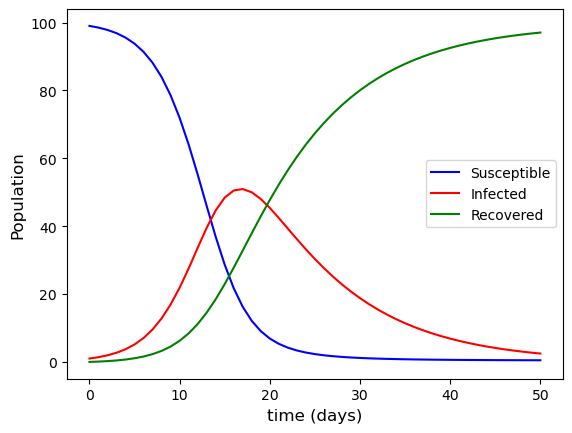

[[99.          1.          0.        ]
 [98.505       1.395       0.1       ]
 [97.81792762  1.94257238  0.2395    ]
 [96.86783561  2.69840716  0.43375724]
 [95.5608913   3.73551075  0.70359795]
 [93.77604762  5.14680335  1.07714903]
 [91.36281324  7.0453574   1.59182936]
 [88.14439488  9.55924002  2.2963651 ]
 [83.93142774 12.81628316  3.25228911]
 [78.55298302 16.91309956  4.53391742]
 [71.91011091 21.86466171  6.22522738]
 [64.04865967 27.53964679  8.41169355]
 [55.22927234 33.60506943 11.16565823]
 [45.94935469 39.52448014 14.52616517]
 [36.8687329  44.65265391 18.47861318]
 [28.63729905 48.41882238 22.94387858]
 [21.70437757 50.50986162 27.78576081]
 [16.22295203 50.94030099 32.83674698]
 [12.09094173 49.97828119 37.93077707]
 [ 9.0695193  48.0018755  42.92860519]
 [ 6.89274962 45.37845763 47.72879274]
 [ 5.32883789 42.4045236  52.26663851]
 [ 4.19900373 39.2939054  56.50709087]
 [ 3.37402745 36.18949114 60.43648141]
 [ 2.76350577 33.18106371 64.05543052]
 [ 2.30502546 30.32143764

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):
    
    m = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, m))
        
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y


# Define SIR model
def SIR(_, y):
    S, I, R = y
    N = S + I + R
    dS = -beta / N * I * S
    dI = beta / N * I * S - gamma * I
    dR = gamma * I
    return np.array([ dS, dI, dR ])


# Define IVP parameters
tspan = [0, 50]           # boundaries of the t domain
y0 = [99, 1, 0]           # initial values
beta, gamma = 0.5, 0.1    # Model parameters
h = 1                     # step length

# Solve the IVP using the Euler method
t, y = euler(SIR, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-", label="Susceptible")
plt.plot(t, y[:,1], "r-", label="Infected")
plt.plot(t, y[:,2], "g-", label="Recovered")
plt.xlabel("time (days)", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.legend()
plt.show()

from myst_nb import glue
glue("sir_plot", fig, display=False)

print(y)

## Code

The function `euler()` which computes the solutions to a system of ODEs using the Euler method is shown below. This is very similar to the function used to solve a [single ODE](euler-code-section) with the exception that `y` is initialised to be a $(nsteps + 1) \times m$ array where $m$ is the number of equations in the system. The first row of `y` is set equal to the initial values `y0` and a for loop is used to step through the Euler method. 

`````{tab-set}
````{tab-item} Python
```python
def euler(f, tspan, y0, h):
    
    m = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, m))
        
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y
```
````

````{tab-item} MATLAB
```matlab
function [t, y] = euler(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
m = length(y0);
t = zeros(1, nsteps + 1);
y = zeros(nsteps + 1, m);

t(1) = tspan(1);
y(1,:) = y0;

for n = 1 : length(t) - 1
    y(n+1,:) = y(n,:) + h * f(t(n), y(n,:));
    t(n+1) = t(n) + h;
end

y = y;

end
```

Note that this function assumes that the ODE function returns an $N \times 1$ vector.
````
`````

The code below sets up and solves the SIR model example from {prf:ref}`sir-example` using the Euler method

`````{tab-set}
````{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):
    
    m = len(y0)
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros((nsteps + 1, m))
        
    t[0] = tspan[0]
    y[0,:] = y0
    
    for n in range(nsteps):
        y[n+1,:] = y[n,:] + h * f(t[n], y[n,:])
        t[n+1] = t[n] + h

    return t, y


# Define SIR model
def SIR(_, y):
    S, I, R = y
    N = S + I + R
    dS = -beta / N * I * S
    dI = beta / N * I * S - gamma * I
    dR = gamma * I
    return np.array([ dS, dI, dR ])


# Define IVP parameters
tspan = [0, 50]           # boundaries of the t domain
y0 = [99, 1, 0]           # initial values
beta, gamma = 0.5, 0.1    # Model parameters
h = 1                     # step length

# Solve the IVP using the Euler method
t, y = euler(SIR, tspan, y0, h)

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y[:,0], "b-", label="Susceptible")
plt.plot(t, y[:,1], "r-", label="Infected")
plt.plot(t, y[:,2], "g-", label="Recovered")
plt.xlabel("time (days)")
plt.ylabel("Population")
plt.legend()
plt.show()
```
````

````{tab-item} MATLAB
```matlab
% Define IVP parameters
tspan = [0, 50];   % boundaries of the t domain
y0 = [99, 1, 0]';  % initial values [S, I, R]
beta = 0.5;        % infection rate
gamma = 0.1;       % recovery rate
h = 1;             % step length

% Solve the IVP using the Euler method
[t, y] = euler(@(t, y)SIR(t, y, beta, gamma), tspan, y0, h);

% Plot solution
hold on
plot(t, y(:,1), 'b-', LineWidth=2)
plot(t, y(:,2), 'r-', LineWidth=2)
plot(t, y(:,3), 'g-', LineWidth=2)
hold off
xlabel('$t$', Fontsize=14, Interpreter='latex')
ylabel('$y$', Fontsize=14, Interpreter='latex')
legend('Susceptible', 'Infected', 'Recovered', Location="east")
axis padded

% ---------------------------------------------------------------
function [t, y] = euler(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
m = length(y0);
t = zeros(1, nsteps + 1);
y = zeros(nsteps + 1, m);

t(1) = tspan(1);
y(1,:) = y0;

for n = 1 : length(t) - 1
    y(n+1,:) = y(n,:) + h * f(t(n), y(n,:));
    t(n+1) = t(n) + h;
end

y = y;

end

function y = SIR(~, y, beta, gamma)

S = y(1); 
I = y(2);
R = y(3);
N = S + I + R;
y = [ -beta / N * I * S ,
       beta / N * I * S - gamma * I,
       gamma * I ];

end
```

```{note}
Note that the SIR model has been defined using a non-autonomous function so is placed at the bottom of the script file. The `euler()` function takes in 2 inputs `t` and `y`, so the addition input parameters `beta` and `gamma` are passed in using `@(t, y)SIR(t, y, beta, gamma)`. 
```
````
`````